In [2]:
# import necessary libraries
import numpy as np                 # manipulating arrays
import scipy.stats                 # mathematical algorithms
import csv                         # opening csvs
import pandas as pd                # manipulating tabular data
import matplotlib.pyplot as plt    # regression plot
import math
import seaborn as sns

## Data Collection and Data Analysis


In [6]:
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

train_data.head(10)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


Statistical Reports on data set:

In [15]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


From the chart above we can discover the data. First we see from the train data set that htere seems to be missing entries for the ages of the passengers. This needs to be addressed by either filling the missing values with some items so the swkeeness of the data is not affected. The same goes for the test data wehere the Age has missing values as well as one missing value in the fare. All of such cases must be addressed before prcessing the data. Second the chart above also describes statistical tools used on each feature. In particular we are interested in the survival data. From the train data set, we get the average survival rate of the passengers is ~38.38% with the high standard deviation of ~0.4865 from the mean. Looking at the mean of the Pclass {1,2,3} we get the mean as ~2.265 indicating that there was a higher proportion of passengers in the second and the third class. This will be helpful when we are determining which features are core to the our report. Likewise the mean age is ~29.69 with standard deviation of ~14.18 indicating a large deviation from the mean. SibSp indicates the number of sibilihgs or spouse and the mean is ~0.44. Parch indicates the number of parents/children aboard for ll passengers. The fare give how much each passenger paid to be on the ship with a mean of ~35.627. 

## Testing Feature relation to Survival rates:
During this process we will first find which features are important to the survival rate of the passengers and clean the data set to use only the found releavant features. 


### Did the class of the passengers effect their survival rate


Survived    0    1  Survival Rate
Pclass                           
1          80  136       0.629630
2          97   87       0.472826
3         372  119       0.242363


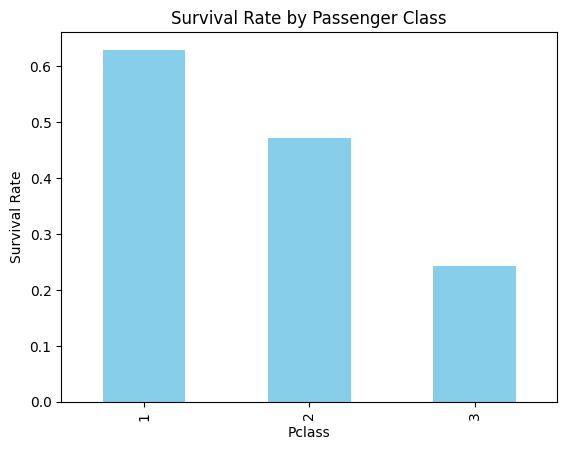

In [18]:
#Visualization: 
pivot_class_survived = train_data.pivot_table(index='Pclass', columns='Survived', aggfunc='size', fill_value=0)

#Survival rate by class
pivot_class_survived['Survival Rate'] = pivot_class_survived[1] / (pivot_class_survived[0] + pivot_class_survived[1])
print(pivot_class_survived)

# Plotting the survival rate by class
pivot_class_survived['Survival Rate'].plot(kind='bar', color='skyblue')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

